# Problem statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# IMPORT MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##Pandas- Pandas is a built in library used for data mainpulation
##numpy-used to perform array operation
##matplotlib and seaborn -used to perform visualization

LOAD DATASET

In [2]:
data=pd.read_csv('Bigmartsale.csv')

In [3]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
data.describe() ##used to perform some satistical calculation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
data.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# preprocessing

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#check for categorical attributes
cat=[]
for x in data.dtypes.index:
    if data.dtypes[x]=='object':
        cat.append(x)
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
cat.remove('Item_Identifier')
cat.remove('Outlet_Identifier')
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
#print categorical col
for x in cat:
    print(x)
    print(data[x].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [12]:
Item_wgt=data.pivot_table(values="Item_Weight",index="Item_Identifier")
Item_wgt

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
wght_nan=data['Item_Weight'].isnull()
wght_nan

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
for x,item in enumerate(data['Item_Identifier']):
    if wght_nan[x]:
        if item in Item_wgt:
            data['Item_Weight'][x]=Item_wgt.loc[item]['Item_Weight']
        else:
                data['Item_Weight'][x]=np.mean(data['Item_Weight'])
                
            

C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
data['Item_Weight'].isnull().sum()

0

In [16]:
outlet_mode=data.pivot_table(values="Outlet_Size",columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
outlet_nan=data['Outlet_Size'].isnull()
data.loc[outlet_nan,'Outlet_Size']=data.loc[outlet_nan,'Outlet_Type'].apply(lambda x: outlet_mode[x])

In [18]:
data['Outlet_Size'].isnull().sum()

0

In [19]:
sum(data['Item_Visibility']==0)

526

In [20]:
data.loc[:,'Item_Visibility'].replace([0],[data['Item_Visibility'].mean()],inplace=True)

In [21]:
sum(data['Item_Visibility']==0)

0

In [22]:
#combining Item fat content
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Creating new attribute

In [23]:
data['New_Item']=data['Item_Identifier'].apply(lambda x:x[:2])
data['New_Item']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item, Length: 8523, dtype: object

In [24]:
data['New_Item']=data['New_Item'].map({'FD':'Food','NC':'Non Consumable','DR':'Drinks'})

In [25]:
data['New_Item'].value_counts()

Food              6125
Non Consumable    1599
Drinks             799
Name: New_Item, dtype: int64

In [26]:
data.loc[data['New_Item']=='Non Consumable','Item_Fat_Content']='Non Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

In [27]:
data['Outlet_Year']=2013-data['Outlet_Establishment_Year'] 

In [28]:
data['Outlet_Year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

Exploratory Data Analysis

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumable,26


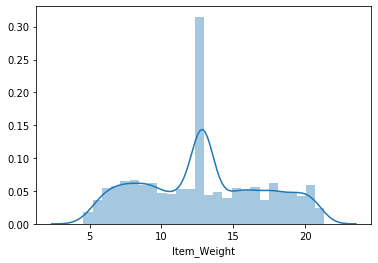

In [30]:
sns.distplot(data['Item_Weight'])

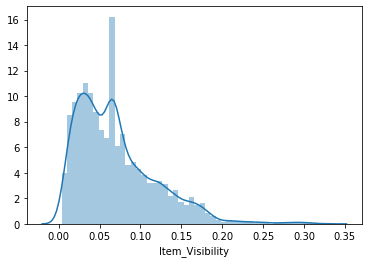

In [31]:
sns.distplot(data['Item_Visibility'])

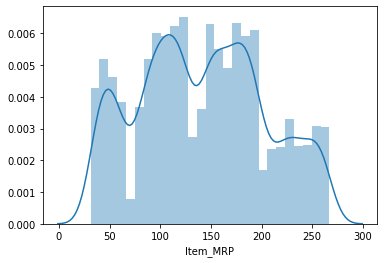

In [32]:
sns.distplot(data['Item_MRP'])

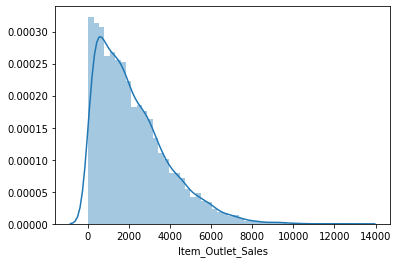

In [33]:
sns.distplot(data['Item_Outlet_Sales'])

In [34]:
#log transformation
data['Item_Outlet_Sales']=np.log(1+data['Item_Outlet_Sales'])

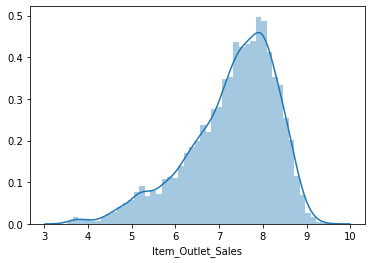

In [35]:
sns.distplot(data['Item_Outlet_Sales'])

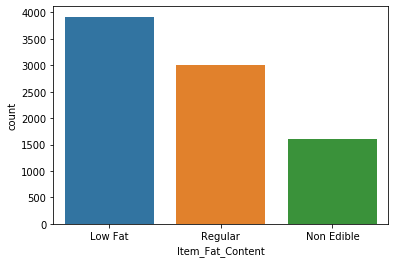

In [36]:
#categorical attributes
sns.countplot(data['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

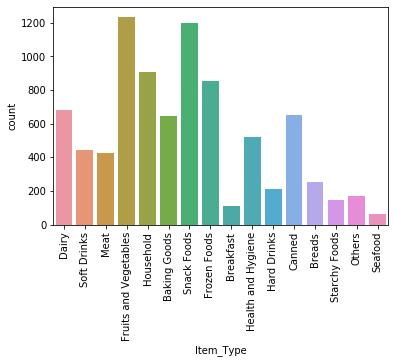

In [37]:
#plt.figure(figsize=(25,5))
l=list(data['Item_Type'].unique())
chart=sns.countplot(data['Item_Type'])
chart.set_xticklabels(labels=l,rotation=90)

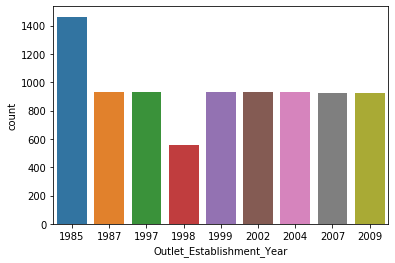

In [38]:
sns.countplot(data['Outlet_Establishment_Year'])

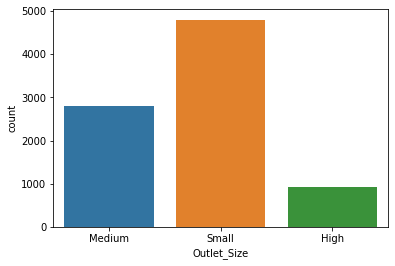

In [39]:
sns.countplot(data['Outlet_Size'])

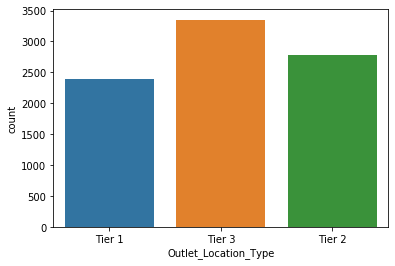

In [40]:
sns.countplot(data['Outlet_Location_Type'])

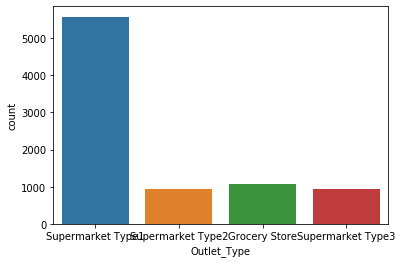

In [41]:
sns.countplot(data['Outlet_Type'])

# Correlation matrix

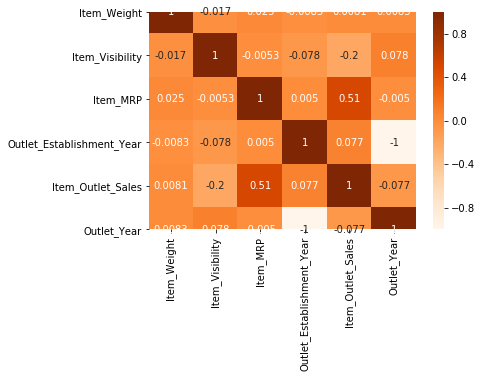

In [42]:
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='Oranges')

# Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
data['outlet']=la.fit_transform(data['Outlet_Identifier'])
cat1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item']
for x in cat1:
    data[x]=la.fit_transform(data[x])
    


# One Hot Encoging

In [45]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','New_Item'])

In [46]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet_Year,outlet,...,Item_Type_15,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,New_Item_0,New_Item_1,New_Item_2
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,1,8.225808,14,9,...,0,0,1,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,2,6.096776,4,3,...,0,0,1,0,0,0,1,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,1,7.648868,14,9,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,182.0950,OUT010,1998,0,6.597664,15,0,...,0,0,0,1,0,0,1,0,1,0
4,NCD19,8.93,0.066132,53.8614,OUT013,1987,1,6.903451,26,1,...,0,1,0,0,0,0,1,0,0,1


# InputSplit 

In [47]:
x=data.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=data['Item_Outlet_Sales']

# Model Training

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train (model,x,y):
    model.fit(x,y)    #train the model
    pre=model.predict(x) #predict the training set
    score=cross_val_score(model,x,y,scoring='neg_mean_squared_error')##performing the cross validation
    score=np.abs(np.mean(score))  ##average for score
    print("Model Report")
    print("MSE",mean_squared_error(y,pre))
    print("CVS",score)
    

Model Report
MSE 0.30916341083214605
CVS 0.311671693080956


C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


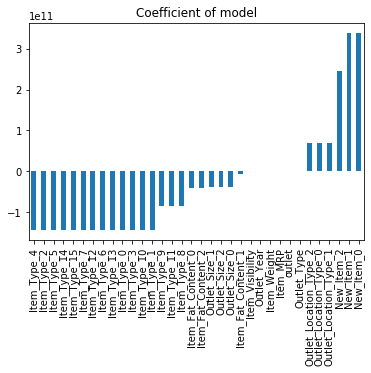

In [49]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model=LinearRegression(normalize=True)
train(model,x,y)
cof=pd.Series(model.coef_,x.columns).sort_values()
cof.plot(kind='bar',title="Coefficient of model")

Model Report
MSE 0.522589287804329
CVS 0.5252675971641406


C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


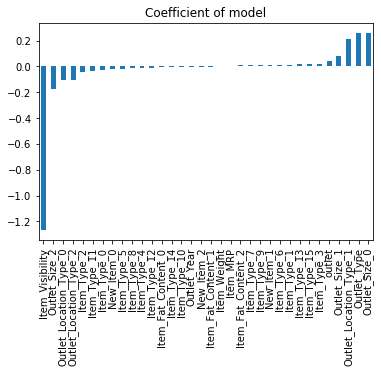

In [50]:
model=Ridge(normalize=True)
train(model,x,y)
cof=pd.Series(model.coef_,x.columns).sort_values()
cof.plot(kind='bar',title="Coefficient of model")

Model Report
MSE 0.7628688679102086
CVS 0.7631830993560983


C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


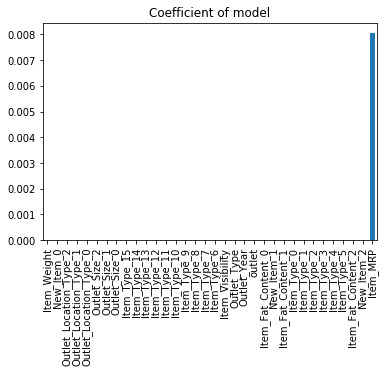

In [51]:
model=Lasso()
train(model,x,y)
cof=pd.Series(model.coef_,x.columns).sort_values()
cof.plot(kind='bar',title="Coefficient of model")

C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
MSE 8.69795098353699e-11
CVS 0.5848238620186362


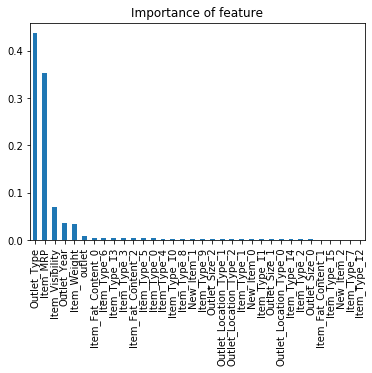

In [52]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,x,y)
cof=pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
cof.plot(kind='bar',title="Importance of feature")

C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
MSE 0.05808016101446316
CVS 0.3321700198798472


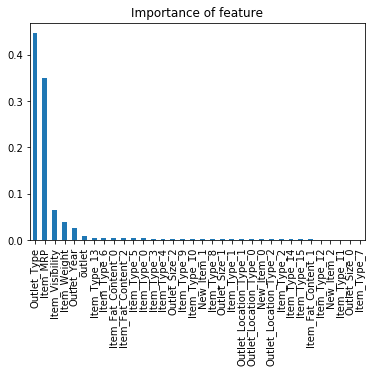

In [53]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
train(model,x,y)
cof=pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
cof.plot(kind='bar',title="Importance of feature")

C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model Report
MSE 2.294837053516803e-12
CVS 0.3603191631681765


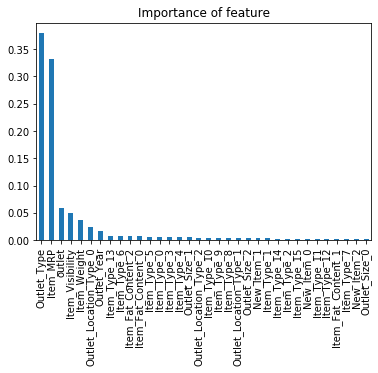

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
train(model,x,y)
cof=pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
cof.plot(kind='bar',title="Importance of feature")